# Analyse van de experimenten

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(filepath_or_buffer="outputdata/accuracycomparison.csv")
dataset.head()

,MFU,MRU,onehotbigru,onehotlstm128,onehotlstm64,onehotgru64,onehotgru128,embeddingsbigru,embeddingsinheritancebigru
0,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False


In [4]:
print(dataset.MFU.value_counts()/len(dataset.MFU))
print(dataset.MRU.value_counts()/len(dataset.MRU))
print()
print(dataset.onehotlstm64.value_counts()/len(dataset.onehotlstm64))
print(dataset.onehotlstm128.value_counts()/len(dataset.onehotlstm128))
print()
print(dataset.onehotgru64.value_counts()/len(dataset.onehotgru64))
print(dataset.onehotgru128.value_counts()/len(dataset.onehotgru128))
print()
print(dataset.onehotbigru.value_counts()/len(dataset.onehotbigru))
print(dataset.embeddingsbigru.value_counts()/len(dataset.embeddingsbigru))
print(dataset.embeddingsinheritancebigru.value_counts()/len(dataset.embeddingsinheritancebigru))

True     0.634151
False    0.365849
Name: MFU, dtype: float64
True     0.745417
False    0.254583
Name: MRU, dtype: float64

True     0.728189
False    0.271811
Name: onehotlstm64, dtype: float64
True     0.733089
False    0.266911
Name: onehotlstm128, dtype: float64

True     0.753224
False    0.246776
Name: onehotgru64, dtype: float64
True     0.766152
False    0.233848
Name: onehotgru128, dtype: float64

True     0.760747
False    0.239253
Name: onehotbigru, dtype: float64
True     0.720982
False    0.279018
Name: embeddingsbigru, dtype: float64
True     0.720793
False    0.279207
Name: embeddingsinheritancebigru, dtype: float64


In [5]:
binwidth = 2000
MFUhistory = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.MFU[start:end]
    MFUhistory.append(sum(subset)/len(subset))

In [6]:
binwidth = 2000
MRUhistory = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.MRU[start:end]
    MRUhistory.append(sum(subset)/len(subset))

In [7]:
binwidth = 2000
lstm64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotlstm64[start:end]
    lstm64history.append(sum(subset)/len(subset))

In [8]:
binwidth = 2000
lstm128history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotlstm128[start:end]
    lstm128history.append(sum(subset)/len(subset))

In [9]:
binwidth = 2000
gru64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotgru64[start:end]
    gru64history.append(sum(subset)/len(subset))

In [10]:
binwidth = 2000
gru128history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotgru128[start:end]
    gru128history.append(sum(subset)/len(subset))

In [11]:
binwidth = 2000
bigru64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.onehotbigru[start:end]
    bigru64history.append(sum(subset)/len(subset))

In [12]:
binwidth = 2000
bigruemb64history = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.embeddingsbigru[start:end]
    bigruemb64history.append(sum(subset)/len(subset))

In [13]:
binwidth = 2000
bigruemb64plushistory = []

for i in range(int(len(dataset)/binwidth)+1):
    start = i*binwidth
    end = min(i*binwidth+binwidth, len(dataset)-1)
    subset = dataset.embeddingsinheritancebigru[start:end]
    bigruemb64plushistory.append(sum(subset)/len(subset))

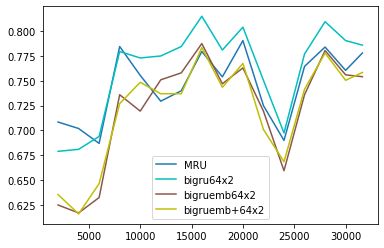

In [14]:
binwidth = 2000
labels=[min(i*binwidth+binwidth, len(dataset)-1) for i in range(int(len(dataset)/binwidth)+1)]

# plt.title(' Accuraatheid op de online-learning dataset (Per 2000 geopende applicaties)')
# plt.plot(labels, MFUhistory, label="MFU")
plt.plot(labels, MRUhistory, label="MRU")
# plt.plot(labels, lstm64history, label="lstm64")
# plt.plot(labels, lstm128history, 'g', label="lstm128")
# plt.plot(labels, gru64history, 'r', label="gru64")
# plt.plot(labels, gru128history, 'm', label="gru128")
plt.plot(labels, bigru64history, 'c', label="bigru64x2")
plt.plot(labels, bigruemb64history, 'tab:brown', label="bigruemb64x2")
plt.plot(labels, bigruemb64plushistory, 'y', label="bigruemb+64x2")
plt.legend()
plt.savefig("outputdata/AccuracyOverTime.png")
plt.show()
